## New Testament Analysis Notebook yay

#### The purpose of this notebook is to look for unique words in different books of the New Testament.

- The goal is to find words that are unique to each book, with some exceptions- for example, we will compare the Pastorals to the rest of the Pauline corpus, and the Gospel of John to the rest of the Johannine corpus, etc.

- This will of course, be a very rough analysis, but it will give us a sense of the vocabulary of each book. It will also give us a sense of the vocabulary of each author, and how that vocabulary changes over time.



We are using the Greek NT from [here](https://www.kaggle.com/datasets/prykon/greek-new-testament-textus-receptus-15501894).

NOTE: You must have an API key to download the data. You can get a free one [here](https://www.kaggle.com/docs/api#getting-started-installation-&-authentication).
Alternatively, you can download the data from [here](https://www.kaggle.com/datasets/prykon/greek-new-testament-textus-receptus-15501894) and put it in the `data` folder.

In [2]:
# Imports

# Use these on Google Colab after downloading your kaggle.json key! Or just move it to ~/.kaggle/kaggle.json locally.
# from google.colab import files
# files.upload() # Upload your kaggle.json
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json


import kaggle
import zipfile
import os
import pandas as pd
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt


Saving kaggle.json to kaggle.json


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Download and unzip the dataset

!kaggle datasets download -d prykon/greek-new-testament-textus-receptus-15501894

with zipfile.ZipFile("greek-new-testament-textus-receptus-15501894.zip","r") as zip_ref:
    zip_ref.extractall("data")

# Remove the zip file
os.remove("greek-new-testament-textus-receptus-15501894.zip")


100% 799k/799k [00:00<00:00, 1.27MB/s]
100% 799k/799k [00:00<00:00, 1.26MB/s]


At this point, the data is in the form of a csv file, with each row containing a verse. We will need to do some preprocessing to get it into a form that is usable for our purposes.

In [4]:
nt = pd.read_csv("data/00-new-testament.csv")

print(nt.head())
print(nt.tail())


      book  chapter  verse                                               text
0  matthew        1      1  βιβλος γενεσεως ιησου χριστου υιου δαβιδ υιου ...
1  matthew        1      2  αβρααμ εγεννησεν τον ισαακ ισαακ δε εγεννησεν ...
2  matthew        1      3  ιουδας δε εγεννησεν τον φαρες και τον ζαρα εκ ...
3  matthew        1      4  αραμ δε εγεννησεν τον αμιναδαβ αμιναδαβ δε εγε...
4  matthew        1      5  σαλμων δε εγεννησεν τον βοοζ εκ της ραχαβ βοοζ...
            book  chapter  verse  \
7951  revelation       22     17   
7952  revelation       22     18   
7953  revelation       22     19   
7954  revelation       22     20   
7955  revelation       22     21   

                                                   text  
7951  και το πνευμα και η νυμφη λεγουσιν ελθε και ο ...  
7952  συμμαρτυρουμαι γαρ παντι ακουοντι τους λογους ...  
7953  και εαν τις αφαιρη απο των λογων βιβλου της πρ...  
7954  λεγει ο μαρτυρων ταυτα ναι ερχομαι ταχυ αμην ν...  
7955  η χαρις του κυριου 

We will now make a list of the frequencies of each book!


In [5]:
# Function to preprocess and count word frequency
def count_word_frequency(text):
    # Convert to lowercase
    text_lower = text.lower()

    # Remove punctuation
    translator = str.maketrans("", "", string.punctuation)
    text_no_punct = text_lower.translate(translator)

    # Tokenize the text
    tokens = word_tokenize(text_no_punct)

    # Remove stopwords
    stop_words = set(stopwords.words('greek'))  # assuming the text is in Greek
    tokens = [word for word in tokens if word not in stop_words]

    # Count word frequency
    word_frequency = Counter(tokens)

    return word_frequency

In [6]:
# Apply the function to each row in the dataframe
nt['word_frequency'] = nt['text'].apply(count_word_frequency)

# Display the dataframe with word frequency
print(nt[['book', 'chapter', 'verse', 'word_frequency']])


book_word_frequency = {}
for index, row in nt.iterrows():
    book = row['book']
    word_frequency = row['word_frequency']

    if book in book_word_frequency:
        book_word_frequency[book] += word_frequency
    else:
        book_word_frequency[book] = word_frequency


            book  chapter  verse  \
0        matthew        1      1   
1        matthew        1      2   
2        matthew        1      3   
3        matthew        1      4   
4        matthew        1      5   
...          ...      ...    ...   
7951  revelation       22     17   
7952  revelation       22     18   
7953  revelation       22     19   
7954  revelation       22     20   
7955  revelation       22     21   

                                         word_frequency  
0     {'βιβλος': 1, 'γενεσεως': 1, 'ιησου': 1, 'χρισ...  
1     {'αβρααμ': 1, 'εγεννησεν': 3, 'ισαακ': 2, 'ιακ...  
2     {'ιουδας': 1, 'εγεννησεν': 3, 'φαρες': 2, 'ζαρ...  
3     {'αραμ': 1, 'εγεννησεν': 3, 'αμιναδαβ': 2, 'να...  
4     {'σαλμων': 1, 'εγεννησεν': 3, 'βοοζ': 2, 'εκ':...  
...                                                 ...  
7951  {'πνευμα': 1, 'νυμφη': 1, 'λεγουσιν': 1, 'ελθε...  
7952  {'συμμαρτυρουμαι': 1, 'γαρ': 1, 'παντι': 1, 'α...  
7953  {'αφαιρη': 1, 'λογων': 1, 'βιβλου': 2, 

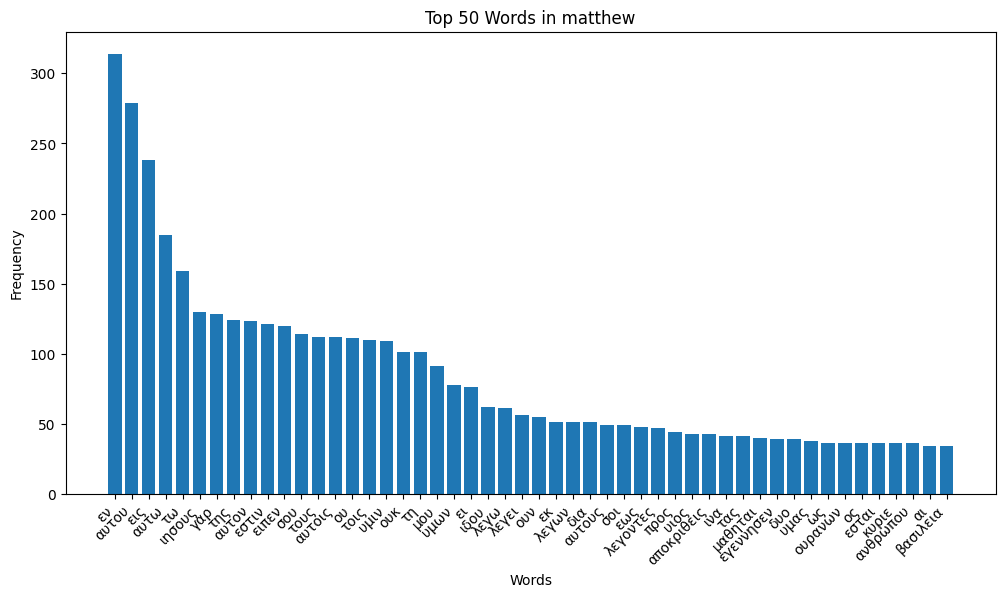

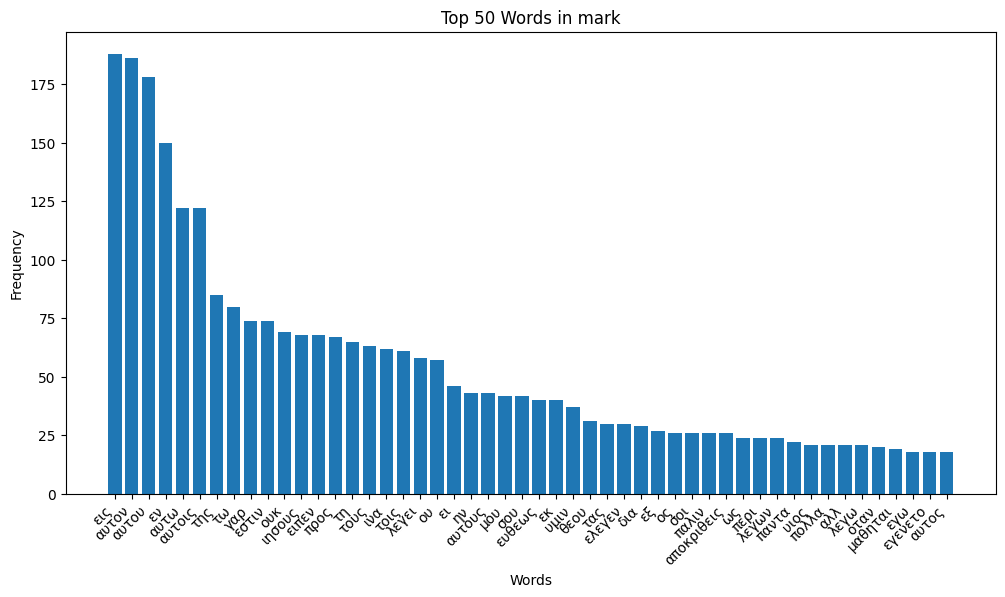

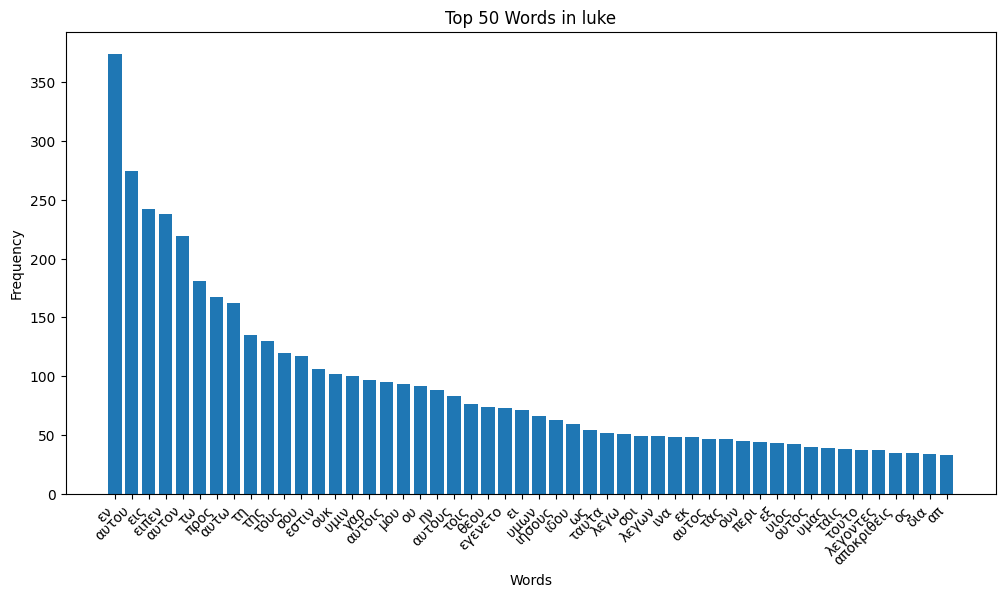

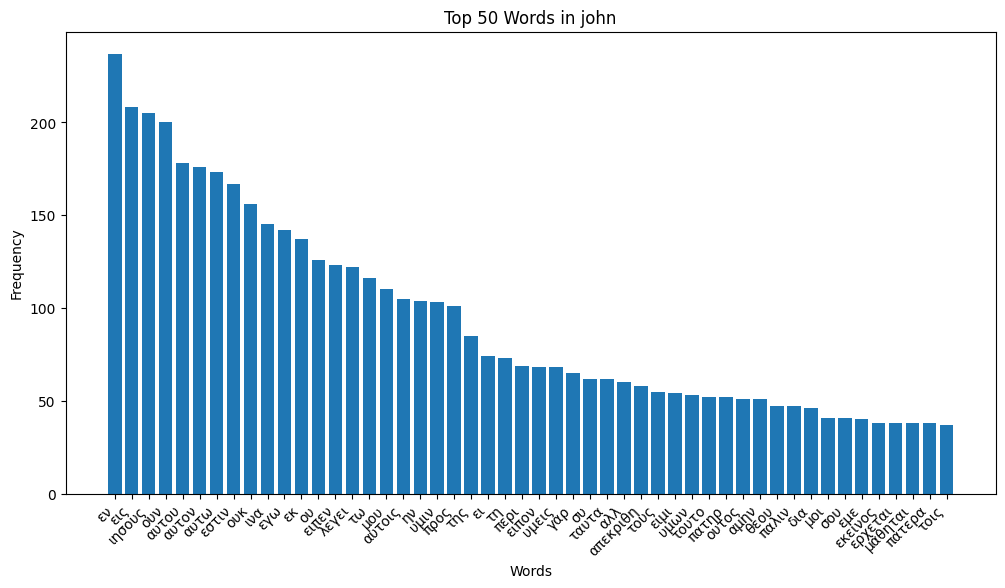

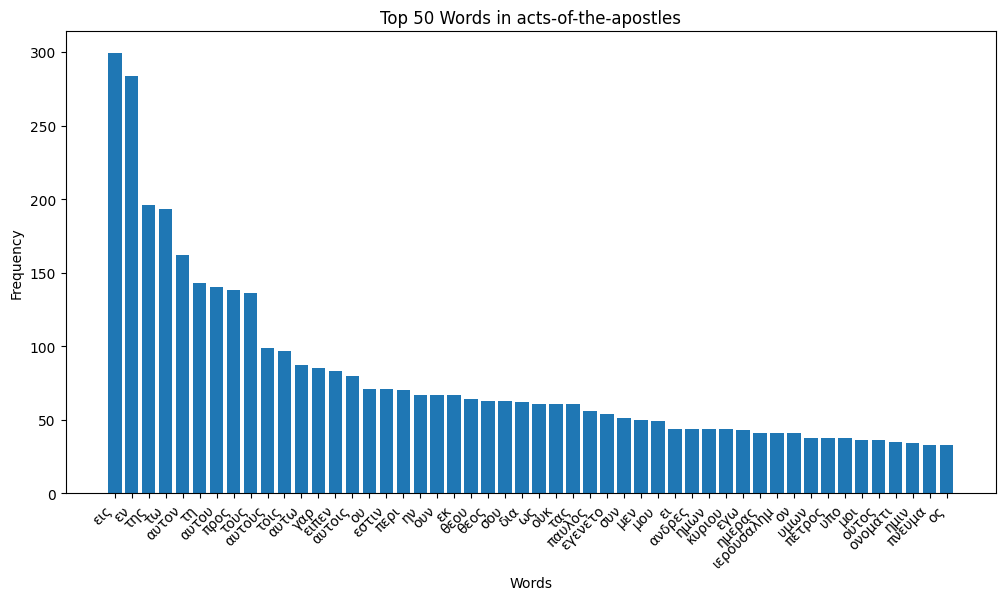

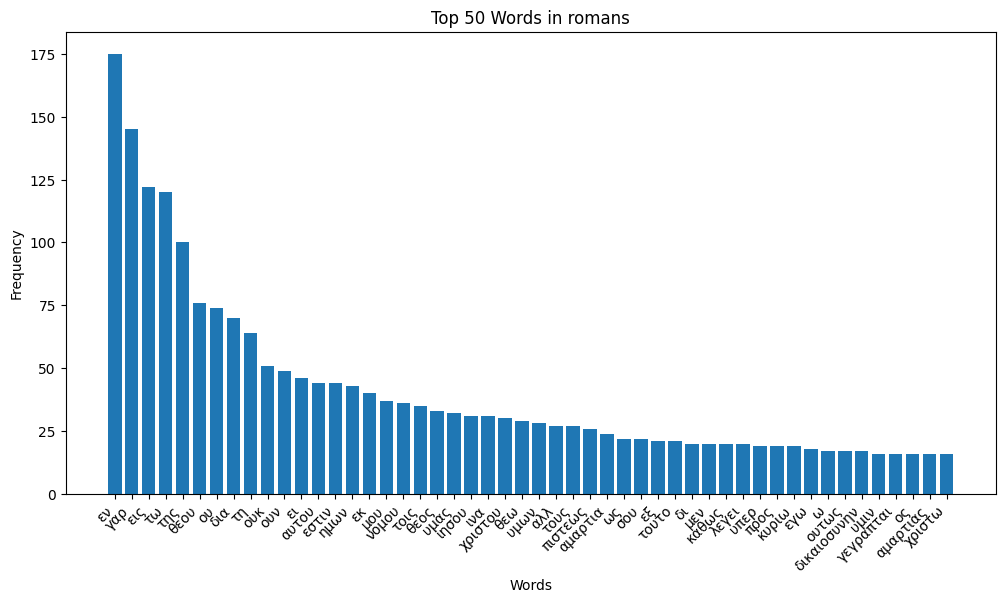

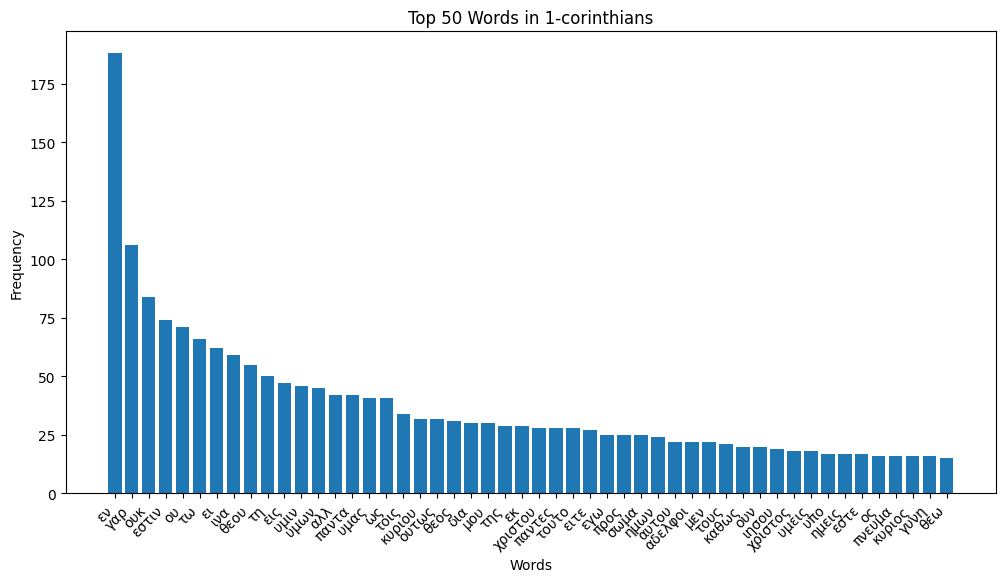

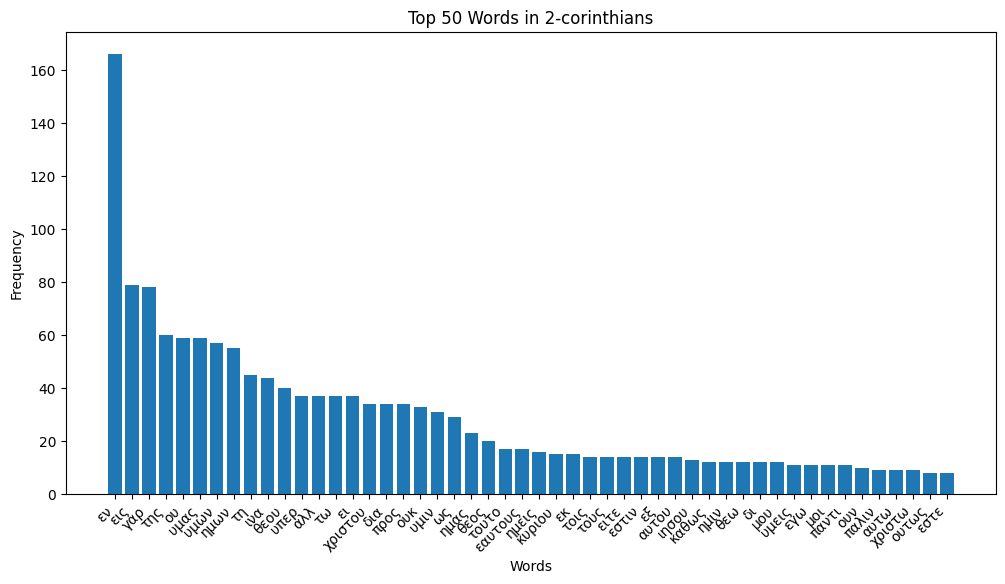

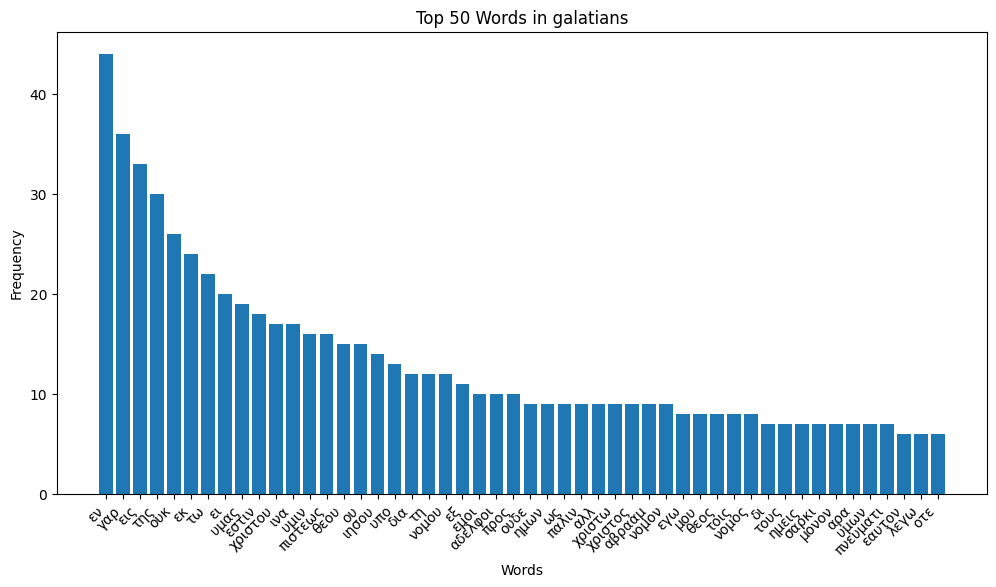

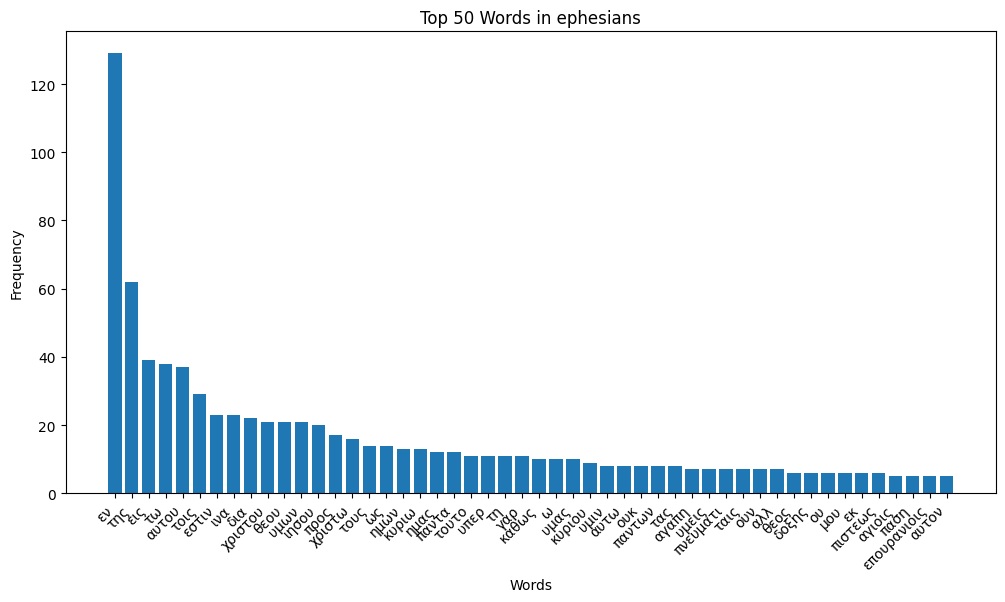

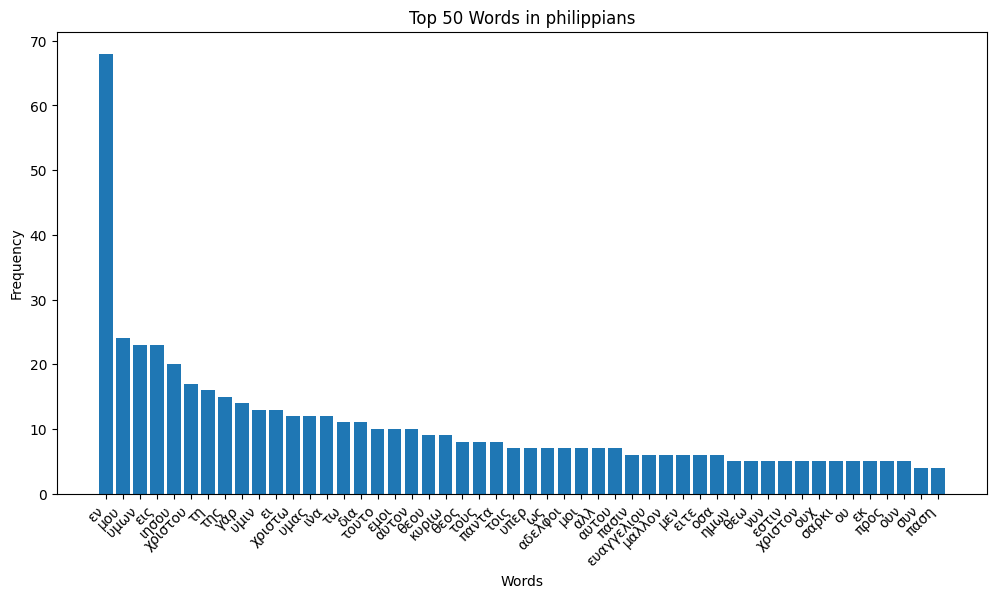

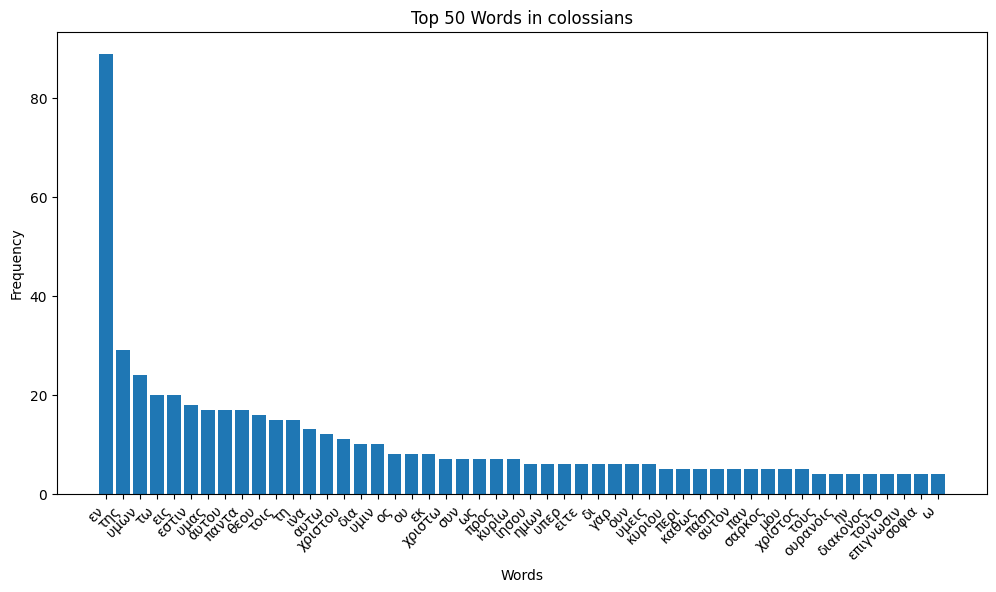

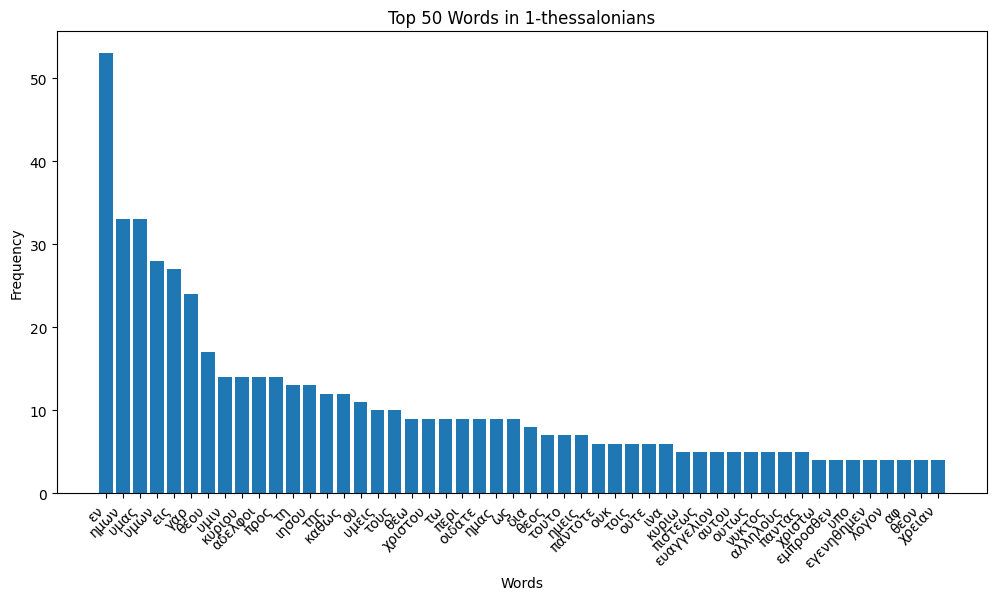

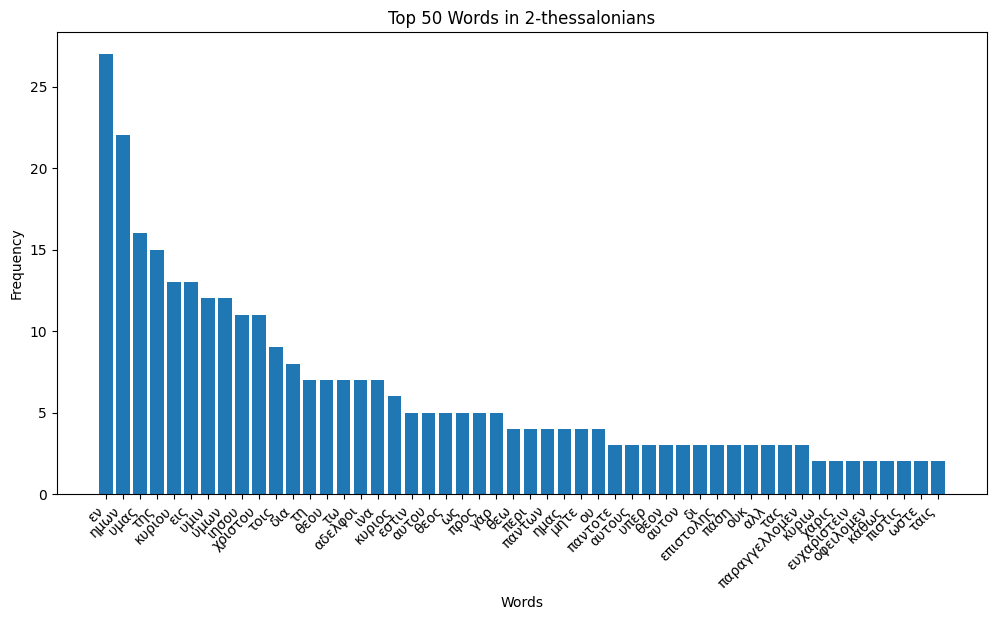

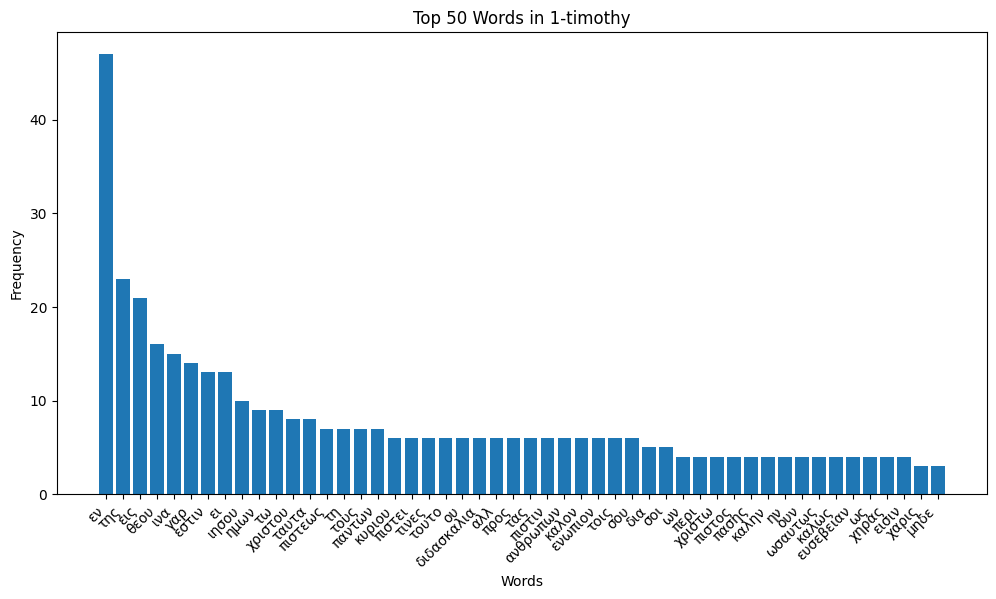

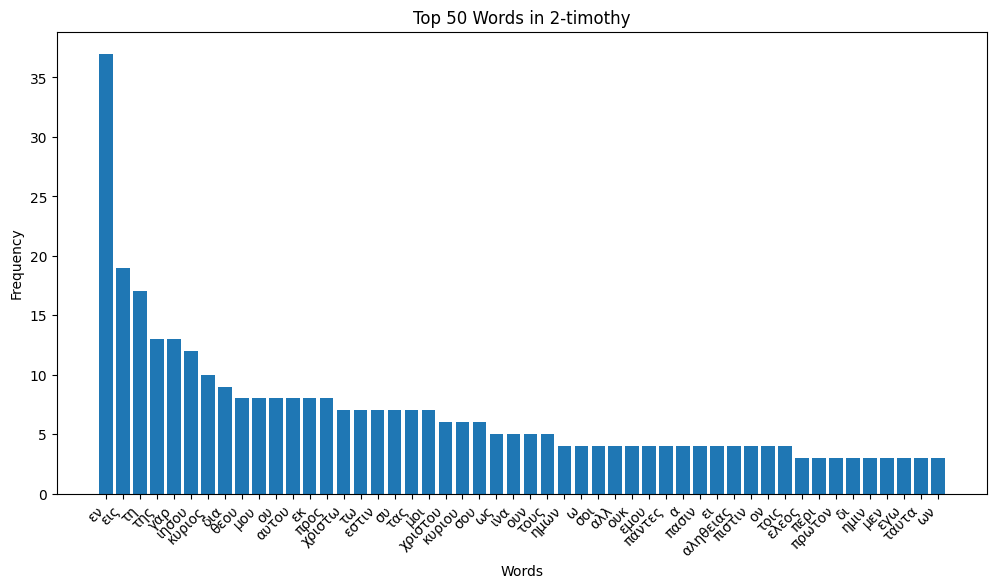

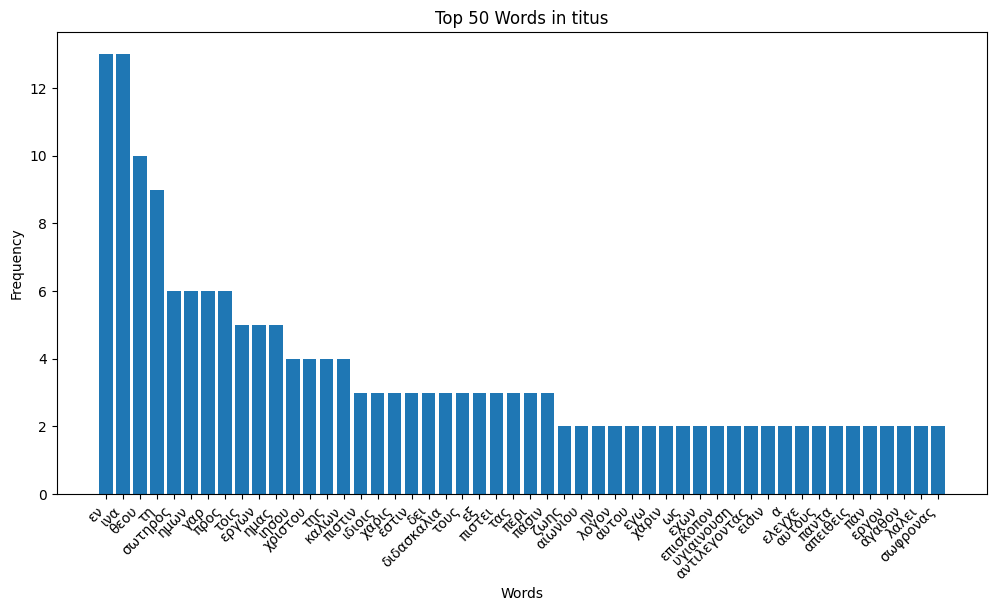

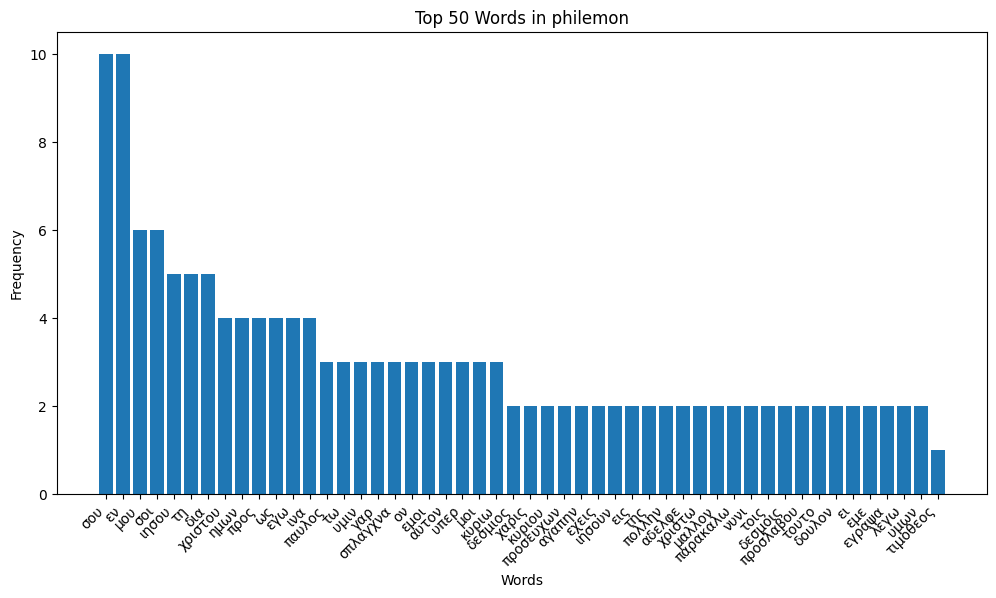

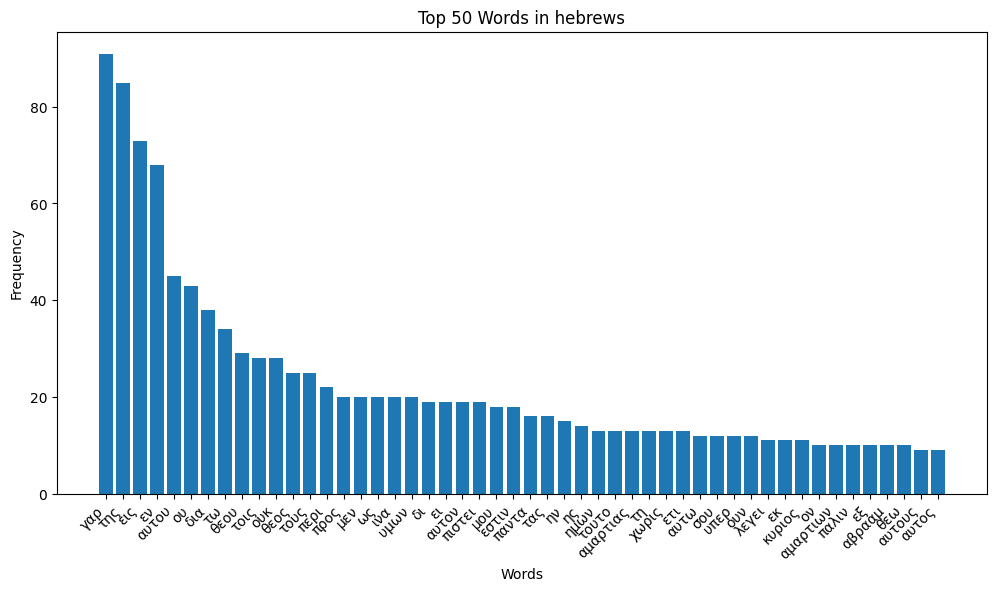

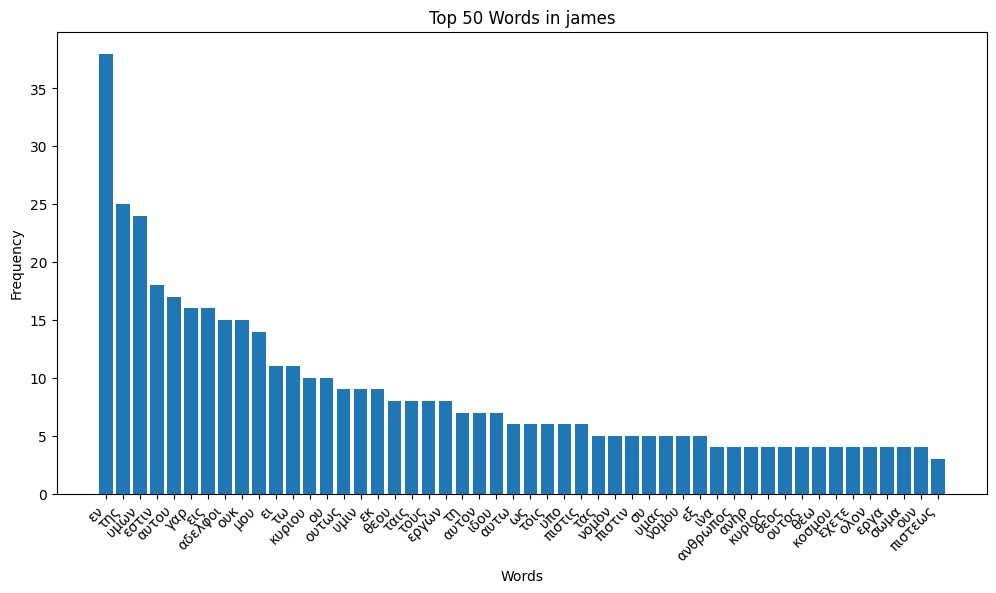

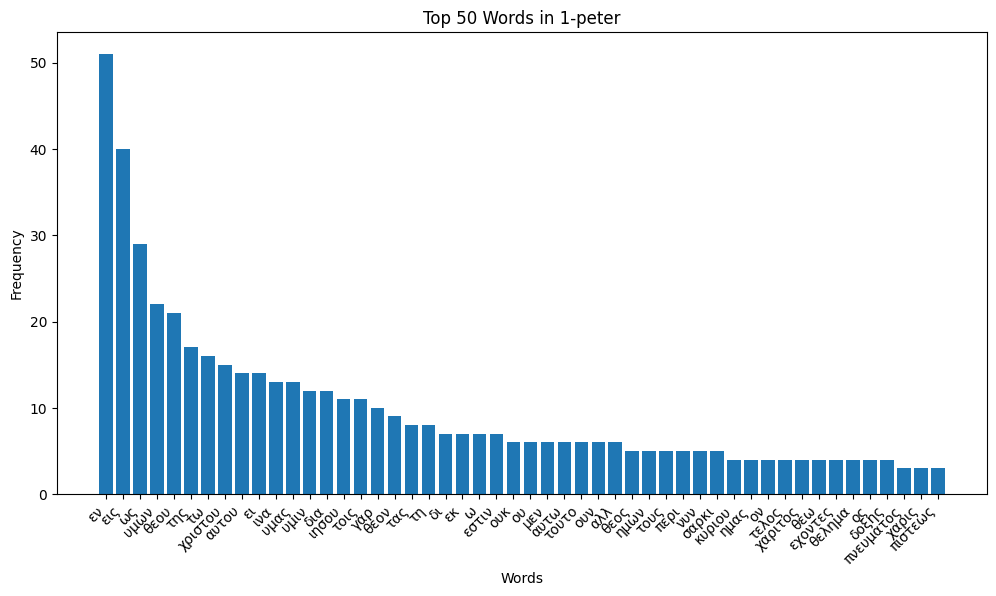

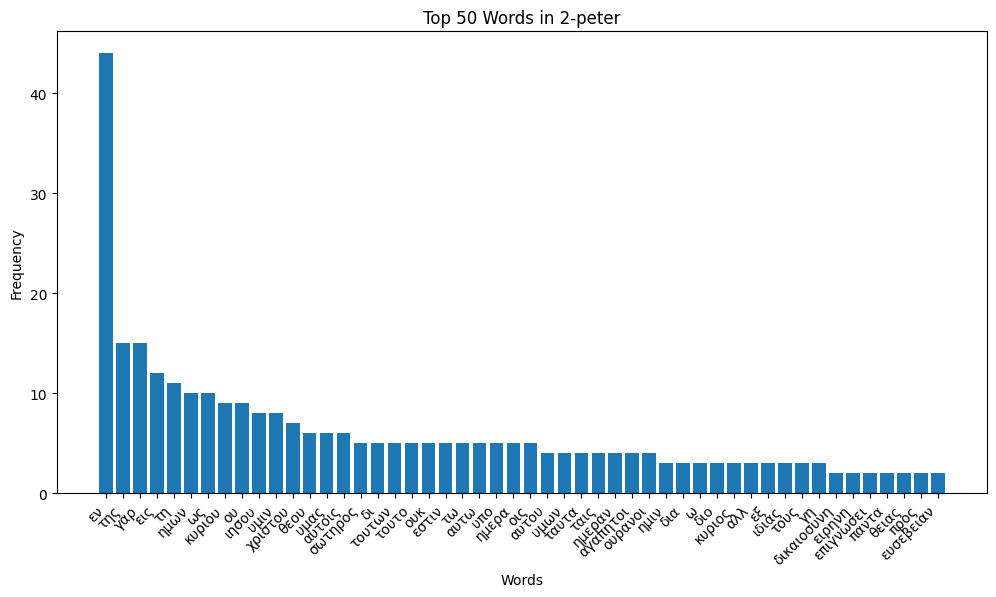

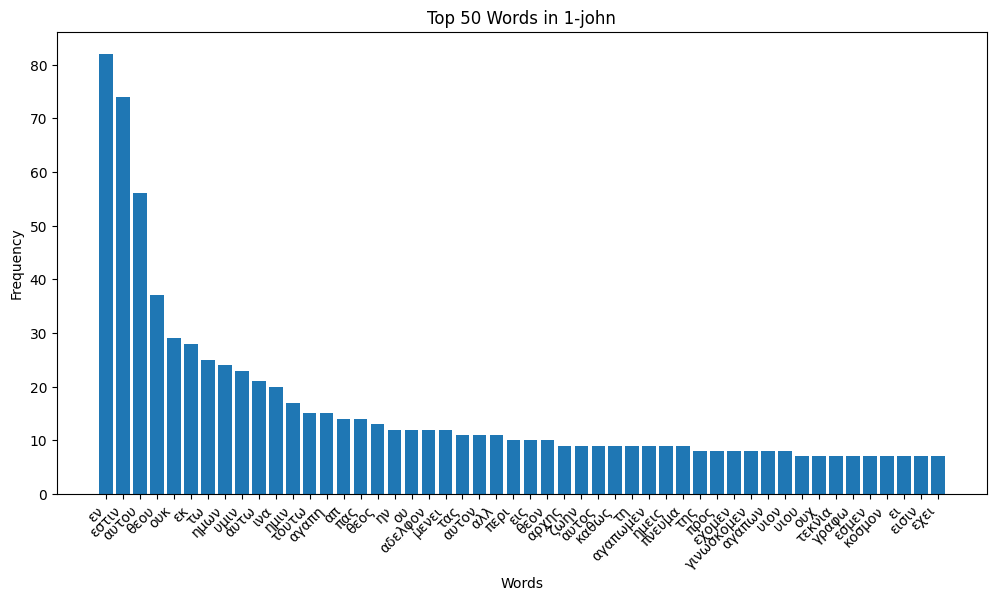

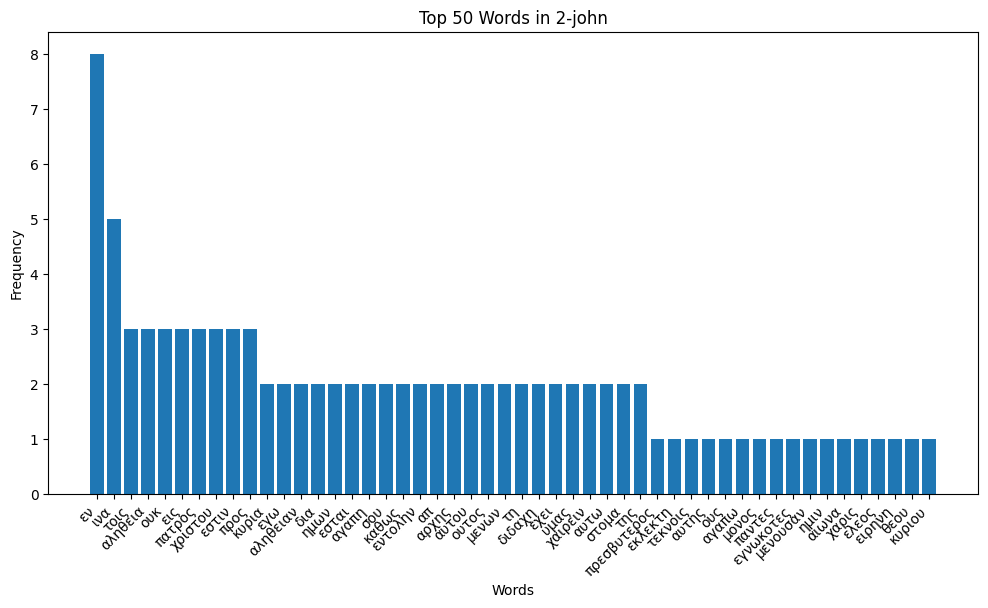

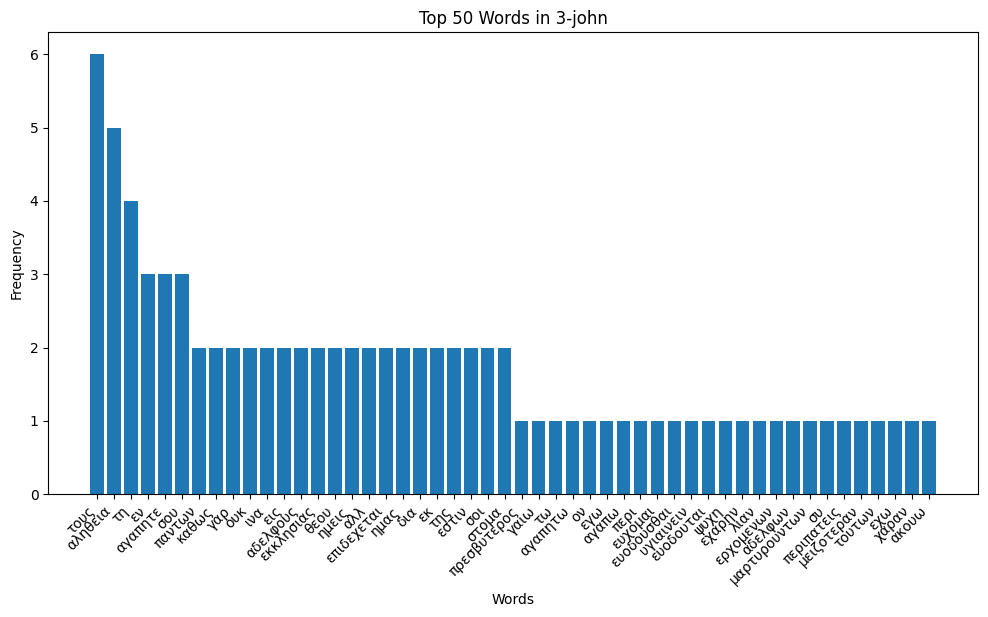

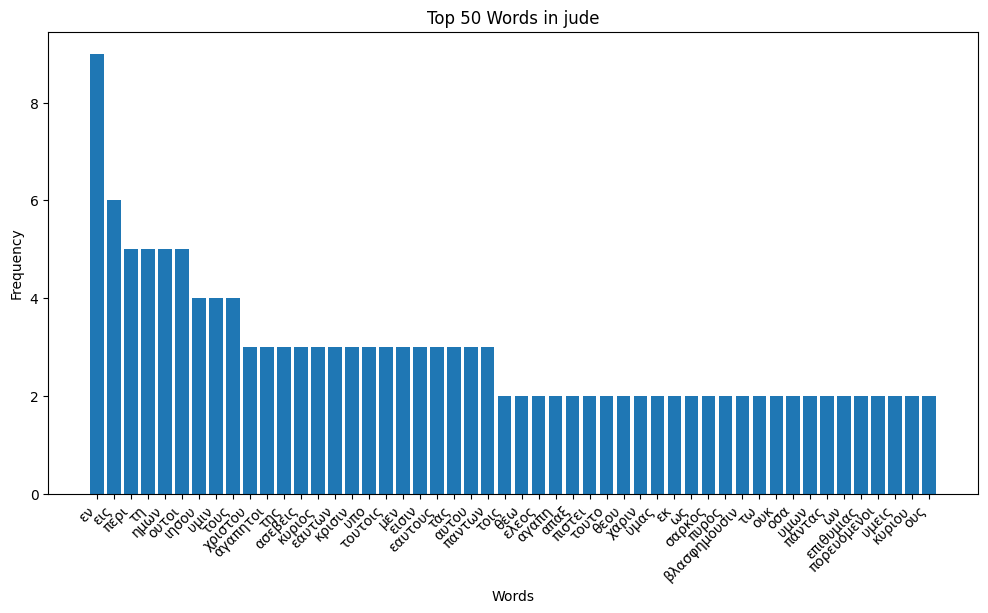

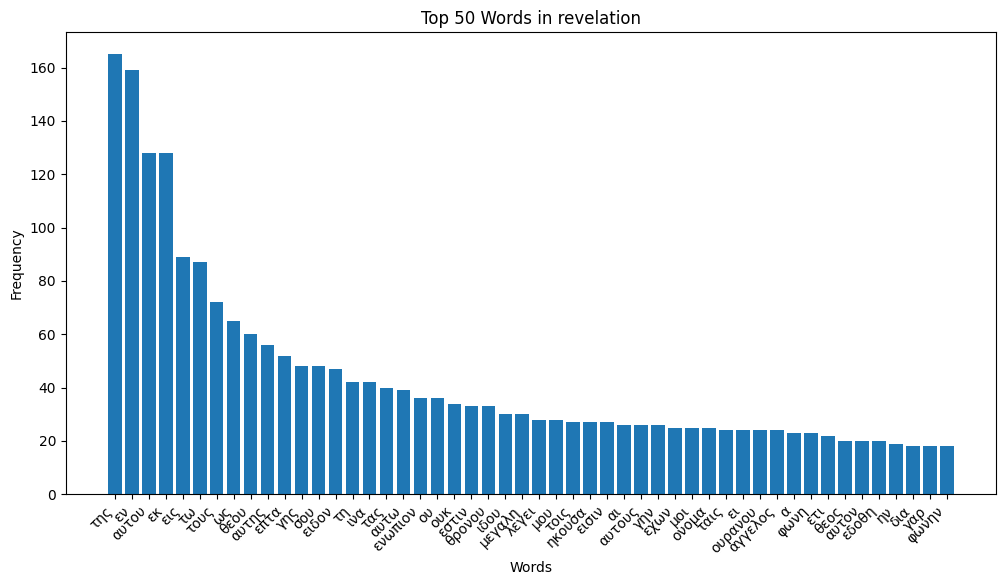

In [ ]:

# Plot the distribution of words by book
top_n_words = 50

for book, frequency in book_word_frequency.items():
    # Get the top N words
    top_words = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True)[:top_n_words])

    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values())
    plt.title(f"Top {top_n_words} Words in {book}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

In [7]:


# Step 1: Calculate word frequencies for each book (excluding Pastoral Epistles)
non_pastoral_books = [book for book in book_word_frequency.keys() if book not in ['1 timothy', '2 timothy', 'titus']]

all_word_frequency = Counter()
for book in non_pastoral_books:
    all_word_frequency += book_word_frequency[book]

# Step 2: Identify unique words in each Pastoral Epistle
pastoral_books = ['1-timothy', '2-timothy', 'titus']

for pastoral_book in pastoral_books:
    pastoral_word_frequency = book_word_frequency.get(pastoral_book, Counter())
    unique_pastoral_words = set(pastoral_word_frequency.keys())

    # Step 3: Calculate the percentage of words in the Pastoral Epistle that show up elsewhere
    common_words_count = sum([pastoral_word_frequency[word] for word in unique_pastoral_words if word in all_word_frequency])
    percentage_common_words = (common_words_count / sum(pastoral_word_frequency.values())) * 100

    print(f"Percentage of words in {pastoral_book} that show up elsewhere in the New Testament: {percentage_common_words:.2f}%")


Percentage of words in 1-timothy that show up elsewhere in the New Testament: 100.00%
Percentage of words in 2-timothy that show up elsewhere in the New Testament: 100.00%
Percentage of words in titus that show up elsewhere in the New Testament: 79.48%


In [28]:
# Define the books for each group
pastoral_books = ['1-timothy', '2-timothy', 'titus']
paul_undisputed_books = ['galatians', 'romans', '1-corinthians', '2-corinthians', 'philemon', 'philippians', '1-thessalonians']

# Step 1: Combine word frequencies for the two groups
pastoral_word_frequency = Counter()
paul_undisputed_word_frequency = Counter()

for book in pastoral_books:
    pastoral_word_frequency += book_word_frequency.get(book, Counter())

for book in paul_undisputed_books:
    paul_undisputed_word_frequency += book_word_frequency.get(book, Counter())

print(pastoral_word_frequency)

# Step 2: Identify the most common words for each group
top_n_common_words = 100
top_pastoral_words = dict(sorted(pastoral_word_frequency.items(), key=lambda item: item[1], reverse=True)[:top_n_common_words])
top_paul_undisputed_words = dict(sorted(paul_undisputed_word_frequency.items(), key=lambda item: item[1], reverse=True)[:top_n_common_words])

# Step 3: Identify the number of words that occur exclusively in one group or the other
exclusive_to_pastoral = set(pastoral_word_frequency.keys()) - set(paul_undisputed_word_frequency.keys())
exclusive_to_paul_undisputed = set(paul_undisputed_word_frequency.keys()) - set(pastoral_word_frequency.keys())

# Step 4: Display information about the most common words and exclusivity
print(f"Top {top_n_common_words} words in Pastorals: {list(top_pastoral_words.keys())}")
print(f"Top {top_n_common_words} words in Paul's Undisputed Letters: {list(top_paul_undisputed_words.keys())}")
print(f"Number of words exclusive to Pastorals: {len(exclusive_to_pastoral)}")
print(f"Number of words exclusive to Paul's Undisputed Letters: {len(exclusive_to_paul_undisputed)}")


Counter({'εν': 97, 'εις': 42, 'της': 40, 'θεου': 34, 'ινα': 33, 'τη': 33, 'γαρ': 33, 'ιησου': 26, 'εστιν': 23, 'προς': 20, 'ημων': 19, 'χριστου': 18, 'ει': 18, 'τω': 18, 'δια': 16, 'τας': 16, 'ου': 15, 'τους': 15, 'τοις': 15, 'κυριου': 13, 'πιστιν': 13, 'ταυτα': 13, 'σου': 13, 'πιστει': 11, 'χριστω': 11, 'ως': 11, 'αυτου': 11, 'κυριος': 11, 'εκ': 10, 'περι': 10, 'διδασκαλια': 10, 'αλλ': 10, 'σοι': 10, 'σωτηρος': 9, 'πιστεως': 9, 'ων': 9, 'τουτο': 9, 'ουν': 9, 'παντων': 9, 'πασιν': 9, 'συ': 9, 'χαρις': 8, 'α': 8, 'εγω': 8, 'λογος': 8, 'ην': 8, 'ενωπιον': 8, 'αληθειας': 8, 'ουκ': 8, 'δει': 8, 'μου': 8, 'πιστος': 7, 'πρωτον': 7, 'ανθρωπων': 7, 'καλον': 7, 'παντα': 7, 'εισιν': 7, 'ω': 7, 'ημας': 7, 'μοι': 7, 'αγαπη': 6, 'τινες': 6, 'χαριν': 6, 'πασης': 6, 'θεω': 6, 'αμην': 6, 'ελθειν': 6, 'θεος': 6, 'ωσαυτως': 6, 'εργων': 6, 'ζωης': 6, 'αποστολος': 5, 'ελεος': 5, 'καλην': 5, 'εχων': 5, 'ιδιοις': 5, 'δι': 5, 'παν': 5, 'σεαυτον': 5, 'ευσεβειαν': 5, 'νυν': 5, 'μαλιστα': 5, 'ταις': 5, 'αιωνιου

In [29]:
# Identify the words from the Pastoral Epistles that occur in Paul's Undisputed Letters
common_pastoral_words = set(top_pastoral_words.keys()) & set(top_paul_undisputed_words.keys())

# Calculate the percentage
percentage_common_pastoral_in_paul_undisputed = (len(common_pastoral_words) / len(top_pastoral_words)) * 100

# Display the result
print(f"Percentage of top words in Pastorals that occur in Paul's Undisputed Letters: {percentage_common_pastoral_in_paul_undisputed:.2f}%")

Percentage of top words in Pastorals that occur in Paul's Undisputed Letters: 53.00%


In [32]:
# Philippians - 1629 word
# Titus 659
# 1 Tim- 1591
# 2 Tim - 1238


philippians = ['philippians']
paul_undisputed_books_wo_philippians = ['galatians', 'romans', '1-corinthians', '2-corinthians', 'philemon', '1-thessalonians']

philippians_word_frequency = Counter()
paul_undisputed_wo_philippians_word_frequency = Counter()

for book in philippians:
    philippians_word_frequency += book_word_frequency.get(book, Counter())

for book in paul_undisputed_books_wo_philippians:
    paul_undisputed_wo_philippians_word_frequency += book_word_frequency.get(book, Counter())


# Step 2: Identify the most common words for each group
top_n_common_words = 100
top_philippians_words = dict(sorted(philippians_word_frequency.items(), key=lambda item: item[1], reverse=True)[:top_n_common_words])
top_paul_undisputed_words_no_phil = dict(sorted(paul_undisputed_wo_philippians_word_frequency.items(), key=lambda item: item[1], reverse=True)[:top_n_common_words])

# Step 3: Identify the number of words that occur exclusively in one group or the other
exclusive_to_philippians = set(philippians_word_frequency.keys()) - set(paul_undisputed_wo_philippians_word_frequency.keys())
exclusive_to_paul_undisputed = set(paul_undisputed_wo_philippians_word_frequency.keys()) - set(philippians_word_frequency.keys())

# Step 4: Display information about the most common words and exclusivity
print(f"Top {top_n_common_words} words in Philippians: {list(top_philippians_words.keys())}")
print(f"Top {top_n_common_words} words in Paul's Undisputed Letters - Philippians: {list(top_paul_undisputed_words_no_phil.keys())}")
print(f"Number of words exclusive to Philippians: {len(exclusive_to_philippians)}")
print(f"Number of words exclusive to Paul's Undisputed Letters: {len(exclusive_to_paul_undisputed)}")

Top 100 words in Philippians: ['εν', 'μου', 'υμων', 'εις', 'ιησου', 'χριστου', 'τη', 'της', 'γαρ', 'υμιν', 'ει', 'χριστω', 'υμας', 'ινα', 'τω', 'δια', 'τουτο', 'εμοι', 'αυτον', 'θεου', 'κυριω', 'θεος', 'τους', 'παντα', 'τοις', 'υπερ', 'ως', 'αδελφοι', 'μοι', 'αλλ', 'αυτου', 'πασιν', 'ευαγγελιου', 'μαλλον', 'μεν', 'ειτε', 'οσα', 'ημων', 'θεω', 'νυν', 'εστιν', 'χριστον', 'ουχ', 'σαρκι', 'ου', 'εκ', 'προς', 'ουν', 'συν', 'παση', 'παντοτε', 'φρονειν', 'λογον', 'δι', 'εξ', 'χριστος', 'οιδα', 'θανατου', 'μονον', 'περι', 'εαυτων', 'ουκ', 'χαιρετε', 'εγω', 'κυριου', 'παντων', 'καθως', 'δεσμοις', 'παντας', 'εμε', 'ωστε', 'πλην', 'παντι', 'ζωης', 'εχων', 'πιστεως', 'παλιν', 'γενομενος', 'αυτω', 'αγαπητοι', 'υμεις', 'πεμψαι', 'ω', 'βλεπετε', 'δικαιοσυνην', 'ταυτα', 'ηδη', 'ων', 'χαρις', 'ειρηνη', 'πατρος', 'δεησει', 'χαρας', 'κοινωνια', 'ευαγγελιον', 'ημερας', 'πεποιθως', 'εργον', 'περισσευη', 'ημεραν']
Top 100 words in Paul's Undisputed Letters - Philippians: ['εν', 'γαρ', 'εις', 'τω', 'της', 'ο

In [34]:
# Identify the words from phillipians that occur in Paul's Undisputed Letters
common_philippians_words = set(top_philippians_words.keys()) & set(top_paul_undisputed_words_no_phil.keys())

# Calculate the percentage
percentage_common_philippians_in_paul_undisputed = (len(common_philippians_words) / len(top_philippians_words)) * 100

# Display the result
print(f"Percentage of top words in Philippians that occur in Paul's Undisputed Letters: {percentage_common_philippians_in_paul_undisputed:.2f}%")

Percentage of top words in Philippians that occur in Paul's Undisputed Letters: 66.00%
